In [2]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm import  tqdm
from matplotlib import pyplot as plt

#### Cleaning data from first two rows


[CppMonk Tutorial](https://www.youtube.com/playlist?list=PLvKAPIGzFEr8n7WRx8RptZmC1rXeTzYtA)
[HABR1](https://habr.com/ru/articles/166693/)
[HABR](https://habr.com/ru/articles/140274/)
[WIKI](https://en.wikipedia.org/wiki/Kalman_filter)

# Smoothing Kalman

**Goal:** 
estimate $x_t \ & \ v_t$
given measurements $Z = x_t + \epsilon_t$
$$
\begin{align}
X_t = \begin{bmatrix}
   x_{t} \\
   v_{t} \\
 \end{bmatrix} \quad
 Z_t = \begin{bmatrix}
   z_{t} \\
 \end{bmatrix}
\end{align}

$$
**Time evolution**
$$ x_{t+1} = x_t + v_t \delta t + \frac{1}{2}a \delta t^2; \quad  v_{t+1} = v_t + a \delta t$$

$$
X_{t+1} = \begin{bmatrix}
  1 & \delta t \\
  0 & 1 \\
 \end{bmatrix} X_t 
 \ + \ 
 \begin{bmatrix}
  \frac{1}{2}\delta t^2 \\
  \delta t \\
 \end{bmatrix} = F \cdot X_t + G \cdot a 
$$

 **Assumptions:** acceleration and error are noise.
	$$ a, \epsilon \ - \ N(0, \Sigma)$$

$$ 
Z_t = \begin{bmatrix} 1 & 0 \end{bmatrix} X_t + \epsilon_t = H \cdot X_t  + \epsilon_t
$$

**Prediction step**
$$
X_{t} - N(X_t, P_t)
$$
$$
X_{t+1} = F X_t; \quad
P_{t+1} = F P_t F^T + G \Sigma^2_a G^T
$$
**Measurement Step**
$$Y = Z_t - H \cdot X_t \ \text{- error between measurement and prediction}$$
$$S_t = H \cdot P_t \cdot H^T + \Sigma^2_a \text{ - error of covariance estimate}$$
$$ K = P_t \cdot H^T \cdot S^{-1}_t \text{ - optimal Kalman step}$$
$$ X^{udated}_t = X_t + K \cdot Y \text{ - updated location step} $$
$$ P^{updated}_t = [I - K \cdot H] \cdot P_t \text{ - updated covariance} $$


# Cointegration Kalman

**Goal:** 
estimate $x_t \ and \ v_t$ - intercept and $\frac{\sigma_2}{\sigma_1} corr$
assuming that $r_2 = x + v \cdot r_1 + \epsilon^{\prime}$
$$
\begin{align}
X_t = \begin{bmatrix}
   x_{t} \\
   v_{t} \\
 \end{bmatrix} \quad
 Z_t = \begin{bmatrix}
   z_{t} \\
 \end{bmatrix} = r^2_t
\end{align}

$$

**Transition model**
$$ X_{t+1} = F \cdot X_t + \epsilon_x$$
$$ F = \begin{bmatrix}
  1 & 0 \\
  0 & 1 \\
 \end{bmatrix}; 
 \quad \epsilon_x - N(0, Q); 
 \quad Q = \begin{bmatrix}
  \delta_{x} & 0 \\
  0 & \delta_{v} \\
 \end{bmatrix} $$
 
 **Observation Model**	
$$ 
r^2_t = Z_t = H \cdot X_t  + \epsilon_t
$$
$$ H = [1 \quad r^1_t]; \quad \epsilon_x - N(0, R);  \quad R = \begin{bmatrix}
  1 & 0 \\
  0 & 1 \\
 \end{bmatrix}$$
 
**Prediction step**
$$
X_{t} - N(X_t, P_t)
$$
$$
X_{t+1} = F X_t; \quad
P_{t+1} = F P_t F^T + Q
$$

**Measurement Step**
$$Y = Z_t - H \cdot X_t \ \text{- error between measurement and prediction}$$
$$S_t = H \cdot P_t \cdot H^T + R \text{ - error of covariance estimate}$$
$$ K = P_t \cdot H^T \cdot S^{-1}_t \text{ - optimal Kalman step}$$
$$ X^{udated}_t = X_t + K \cdot Y \text{ - updated location step} $$
$$ P^{updated}_t = [I - K \cdot H] \cdot P_t \text{ - updated covariance} $$



In [3]:
root = 'data/3/CK_trades/trades/**/*.csv'
paths = glob(root)

def clean(path):
    with open(path, "r+") as f:
        rows = f.readlines()
        f.seek(0)
        f.truncate()
        f.writelines(rows[2:])

# for p in tqdm(paths[1:]):
#     clean(p)

### Reading data

In [4]:
df_list = []
for path in tqdm(paths):
    df = pd.read_csv(path, sep=';')
    df_list.append(df)
    
df_list[0]

  0%|          | 0/11 [00:00<?, ?it/s]/var/folders/r_/xvc889350jb1wjh3s9_zfq4m0000gn/T/ipykernel_17551/4074210982.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';')
 55%|█████▍    | 6/11 [00:36<00:30,  6.12s/it]/var/folders/r_/xvc889350jb1wjh3s9_zfq4m0000gn/T/ipykernel_17551/4074210982.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';')
 82%|████████▏ | 9/11 [00:54<00:11,  5.88s/it]/var/folders/r_/xvc889350jb1wjh3s9_zfq4m0000gn/T/ipykernel_17551/4074210982.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';')
100%|██████████| 11/11 [01:03<00:00,  5.74s/it]


,TRADEDATE,TRADETIME,SECID,BOARDID,PRICE,VOLCUR,INVCURVOL,BUYSELL,TRADENO
0,03.01.2022,06:59:50,USD000UTSTOM,CETS,"74,68",1000,74680,B,428694391
1,03.01.2022,06:59:50,USD000UTSTOM,CETS,"74,68",1000,74680,B,428694392
2,03.01.2022,06:59:50,USD000UTSTOM,CETS,"74,68",4000,298720,B,428694393
3,03.01.2022,06:59:50,USD000UTSTOM,CETS,"74,68",1000,74680,B,428694394
4,03.01.2022,06:59:50,USD000UTSTOM,CETS,"74,68",1000,74680,B,428694395
...,...,...,...,...,...,...,...,...,...
10159535,31.01.2022,23:49:59,USD000UTSTOM,CETS,"77,32",1000,77320,S,440912463
10159536,31.01.2022,23:49:59,USD000UTSTOM,CETS,"77,3175",1000,"77317,5",S,440912464
10159537,31.01.2022,23:49:59,USD000UTSTOM,CETS,"77,315",50000,3865750,S,440912465
10159538,31.01.2022,23:49:59,USD000UTSTOM,CETS,"77,315",1000,77315,S,440912466


<Axes: ylabel='Frequency'>

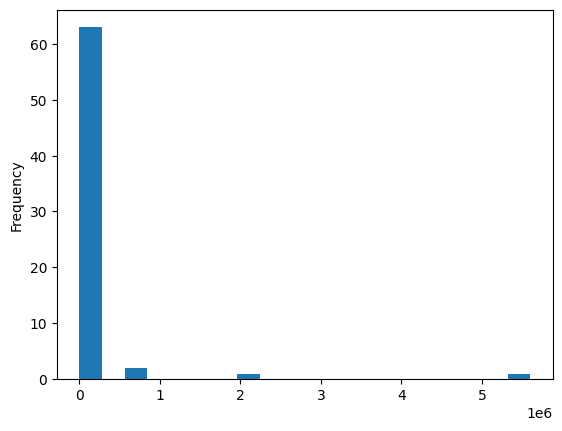

In [5]:
df = df_list[0]
values, counts = np.unique(df.SECID.values, return_counts=True)
stat = pd.DataFrame({'SECID' : values, 'COUNT' : counts})
stat.COUNT.plot.hist(bins=20)

In [6]:
stat

,SECID,COUNT
0,BYNRUB_TOD,12
1,BYNRUB_TOM,5
2,CHFRUBTODTOM,636
3,CHFRUB_TOD,76
4,CHFRUB_TOM,28316
...,...,...
62,USDRUB_TOM3M,10
63,USDRUB_TOM6M,6
64,USDRUB_TOM9M,6
65,USDRUB_WAP0,91
